In [1]:
from opcua import Client
from time import sleep

In [2]:
client = Client("opc.tcp://192.168.1.6:62541")
client.connect()

In [3]:
root_node = client.get_root_node()
root_node

Node(TwoByteNodeId(i=84))

In [4]:
object_node = client.get_objects_node()
object_node

Node(TwoByteNodeId(i=85))

In [5]:
print("Namespace : " + str(client.get_namespace_array()))

Namespace : ['http://opcfoundation.org/UA/', 'urn:freeopcua:python:server', 'CESMII']


In [6]:
objects=client.get_objects_node()
print("Objects = " + str(objects))

Objects = i=85


In [7]:
print(objects.get_children()[0])
print(objects.get_children()[1])
print(objects.get_children()[2])

i=2253
ns=2;s="C_TS1"
ns=2;s="C_CF1"


In [8]:
print(objects.get_children()[1])

ns=2;s="C_TS1"


In [9]:
tempsens= objects.get_children()[1]
tempsens.get_children()

[Node(StringNodeId(ns=2;s="C_TS1_ManfctrName")),
 Node(StringNodeId(ns=2;s="C_TS1_SerialNumber")),
 Node(StringNodeId(ns=2;s="C_TS1_Temperature")),
 Node(StringNodeId(ns=2;s="C_TS1_Time"))]

In [10]:
for i in tempsens.get_children():
      i.get_value()
      print("i value " + str(i.get_value()))

i value CESMII Sensor
i value 12345678
i value 82.59816556524495
i value 2022-03-04 14:49:21.339721


In [11]:
furnace= objects.get_children()[2]
for i in furnace.get_children():
      i.get_value()
      print("i value " + str(i.get_value()))

i value CESMII Furnace
i value 98765432
i value False


In [12]:
Temp = client.get_node('ns=2;s="C_TS1_Temperature"')
Temp.get_value()

49.3825878715748

In [13]:
import pandas as pd
df = pd.DataFrame(columns=['Temperature'])
i=0
while i < 10:
    Temp = client.get_node('ns=2;s="C_TS1_Temperature"')
    print (Temp.get_value())
    df = df.append({'Temperature': Temp.get_value()}, ignore_index=True)
    sleep(2)
    i += 1

3.2532670242106265
55.40663887456376
10.181400683913411
24.429203731710846
63.428615257702305
42.54823554746989
67.9538181082332
7.010789472111433
90.0182279854728
22.55514292559335


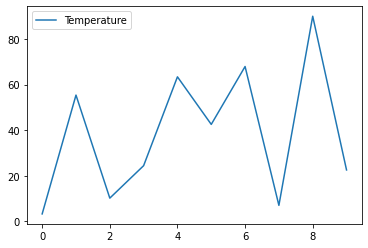

In [14]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [15]:
furnace.get_children()

[Node(StringNodeId(ns=2;s="C_CF1_ManfctrName")),
 Node(StringNodeId(ns=2;s="C_CF1_SerialNumber")),
 Node(StringNodeId(ns=2;s="C_CF1_DoorState"))]

In [16]:
state = client.get_node('ns=2;s="C_CF1_DoorState')
state

Node(StringNodeId(ns=2;s="C_CF1_DoorState))

In [17]:
furnace= objects.get_children()[2]
furnace.get_children()[2]

Node(StringNodeId(ns=2;s="C_CF1_DoorState"))

In [18]:
furnace.get_children()[2].get_value()

False

In [20]:
furnace.get_children()[2].set_value(True)
#print(furnace.get_children()[2].get_value())
#furnace.get_children()[2].set_value(False)
#furnace.get_children()[2].get_value()

Exception in thread Thread-9:
Traceback (most recent call last):
  File "/Users/ppk/miniconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/ppk/miniconda3/lib/python3.8/site-packages/opcua/client/client.py", line 66, in run
    self.client.open_secure_channel(renew=True)
  File "/Users/ppk/miniconda3/lib/python3.8/site-packages/opcua/client/client.py", line 335, in open_secure_channel
    result = self.uaclient.open_secure_channel(params)
  File "/Users/ppk/miniconda3/lib/python3.8/site-packages/opcua/client/ua_client.py", line 275, in open_secure_channel
    return self._uasocket.open_secure_channel(params)
  File "/Users/ppk/miniconda3/lib/python3.8/site-packages/opcua/client/ua_client.py", line 207, in open_secure_channel
    self._send_request(request, message_type=ua.MessageType.SecureOpen, callback=clb)
  File "/Users/ppk/miniconda3/lib/python3.8/site-packages/opcua/client/ua_client.py", line 72, in _send_request
    self._socket.write(

In [25]:
state= furnace.get_children()[2]
state
print("state initial value " + str(state.get_value()))
print("Set State to True")
state.set_value(True)
state.get_value()

state initial value True
Set State to True


True

In [26]:
client.close_session()
print("Client Offline")

Client Offline
